In [2]:
import numpy as np
import control as ct
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
#FLUID CASE
T11 = 2; T12 = 0.3
T21 = 2.5; T22 = 2.5
omegamax =202.946885422



biggamma1 = 1e0 / (T12 * omegamax)
smallgamma1 = 1e0 / (T11 * omegamax)
biggamma2 = 1e0 / (T22 * omegamax)
smallgamma2 = 1e0 / (T21 * omegamax)

In [4]:
#Dado q = y1,z1,y2,z2, checkea si es localmente controlable en este punto
# para esto, primero encuentra un valor u tal que f(q,u) = 0
# Luego checkea si se cumplen las condiciones de Kalman.
def check_local_controlability(y1,z1,y2,z2):
    A = np.zeros((4,4))
    B = np.zeros((4,1))
    
    def f(v):
        u = v[0]
        f1 = -biggamma1*y1 -u*z1
        f2 = smallgamma1 *(1-z1) + u*y1
        f3 = -biggamma2* y2 -u*z2
        f4 = smallgamma2 *(1-z2) + u*y2
        
        #print([f1,f2,f3,f4])
        
        return [f1,f2,f3,f4]

    u0 = sp.optimize.root(f, [0], method = 'lm').x
    
    print("La funcion f evaluada en el u_0 encontrado es: ", f(u0))
    
    u0 = u0[0]
    
    A[0,0] = -biggamma1; A[0,1] = -u0
    A[1,0] = -u0 ; A[1,1] = -smallgamma1
    A[2,2] = -biggamma2; A[2,3] = -u0
    A[3,2] = -u0 ; A[3,3] = -smallgamma2
    
    B[0] = -z1; B[1] = y1
    B[2] = -z2; B[3] = y2
    
    K = ct.ctrb(A,B)
    rnk = np.linalg.matrix_rank(K)
    
    #print(np.linalg.eig(A))
    if rnk == 4:
        return 1
    else:
        return 0
     

In [5]:
check_local_controlability(0,1,0,1)

La funcion f evaluada en el u_0 encontrado es:  [-0.0, 0.0, -0.0, 0.0]


0

la idea de abajo era buscar puntos iniciales para los cuales se cumpliera controlabilidad local, pero graficar estos no es sencillo y no se logro determinar una buena forma de exponer la informacion

In [6]:
n = 5
x = np.linspace(-1,1,n)
X,Y = np.meshgrid(x,x)
factibles = np.zeros((1,2))
#Se generan varias puntos iniciales para probar la controlabilida local
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        if X[i,j]**2 + Y[i,j]**2 <= 1:
            factibles = np.vstack((factibles, np.array([X[i,j],Y[i,j]])))
            

In [7]:
print(factibles.shape)

(14, 2)


In [8]:
W = np.zeros((factibles.shape[0],factibles.shape[0]))
for i in range(factibles.shape[0]):
    for j in range(factibles.shape[0]):
        y1 = factibles[i][0]
        z1 = factibles[i][1]
        y2 = factibles[j][0]
        z2 = factibles[j][1]
        
        #print("Probando con ", y1,z1,y2,z2)
        W[i,j] = check_local_controlability(y1,z1,y2,z2)

La funcion f evaluada en el u_0 encontrado es:  [-0.0, 0.002463698809470858, -0.0, 0.001970959047576686]
La funcion f evaluada en el u_0 encontrado es:  [-0.0, 0.002463698809470858, 0.0, 0.003941918095153372]
La funcion f evaluada en el u_0 encontrado es:  [-0.0, 0.002463698809470858, 0.0019709590475788354, 0.0019709590475745368]
La funcion f evaluada en el u_0 encontrado es:  [-0.0, 0.002463698809470858, 0.0, 0.002956438571365029]
La funcion f evaluada en el u_0 encontrado es:  [0.0, 0.002463698809470858, -0.0019709590475788354, 0.0019709590475745368]
La funcion f evaluada en el u_0 encontrado es:  [-0.0, 0.002463698809470858, 0.001970959047576686, -4.299078454339522e-15]
La funcion f evaluada en el u_0 encontrado es:  [-0.0, 0.002463698809470858, 0.000985479523788343, -4.299078454339522e-15]
La funcion f evaluada en el u_0 encontrado es:  [-0.0, 0.002463698809470858, -0.0, 0.001970959047576686]
La funcion f evaluada en el u_0 encontrado es:  [0.0, 0.002463698809470858, -0.00098547952

In [9]:
x_vec = np.linspace(-1,1,1000)
y_vec_1 = np.sqrt(1-np.power(x_vec,2))
y_vec_2 = -np.sqrt(1-np.power(x_vec,2))


In [10]:
factibles


array([[ 0. ,  0. ],
       [ 0. , -1. ],
       [-0.5, -0.5],
       [ 0. , -0.5],
       [ 0.5, -0.5],
       [-1. ,  0. ],
       [-0.5,  0. ],
       [ 0. ,  0. ],
       [ 0.5,  0. ],
       [ 1. ,  0. ],
       [-0.5,  0.5],
       [ 0. ,  0.5],
       [ 0.5,  0.5],
       [ 0. ,  1. ]])

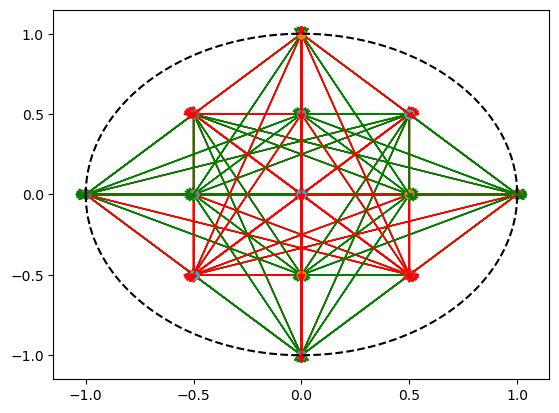

In [11]:
plt.plot(x_vec,y_vec_1, linestyle ='dashed', color='black')
plt.plot(x_vec,y_vec_2, linestyle ='dashed', color='black')
for i in range(factibles.shape[0]):
    for j in range(factibles.shape[0]):
        if W[i,j] == 0:
            colors = 'red'
        else:
            colors = 'green'
        
        y1 = factibles[i][0]
        z1 = factibles[i][1]
        y2 = factibles[j][0]
        z2 = factibles[j][1]
        #print(y1,z1)
        #print(y2,z2)
        plt.scatter(y1,z1)
        plt.scatter(y2,z2)
        plt.arrow(y1,z1,y2-y1,z2-z1,color=colors, shape='full', head_width=0.03)
        #plt.plot([y1,y2],[y2,z2], color = colors)
            